In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2025-10-28 15:30:15.829419: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761665416.021179      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761665416.074440      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


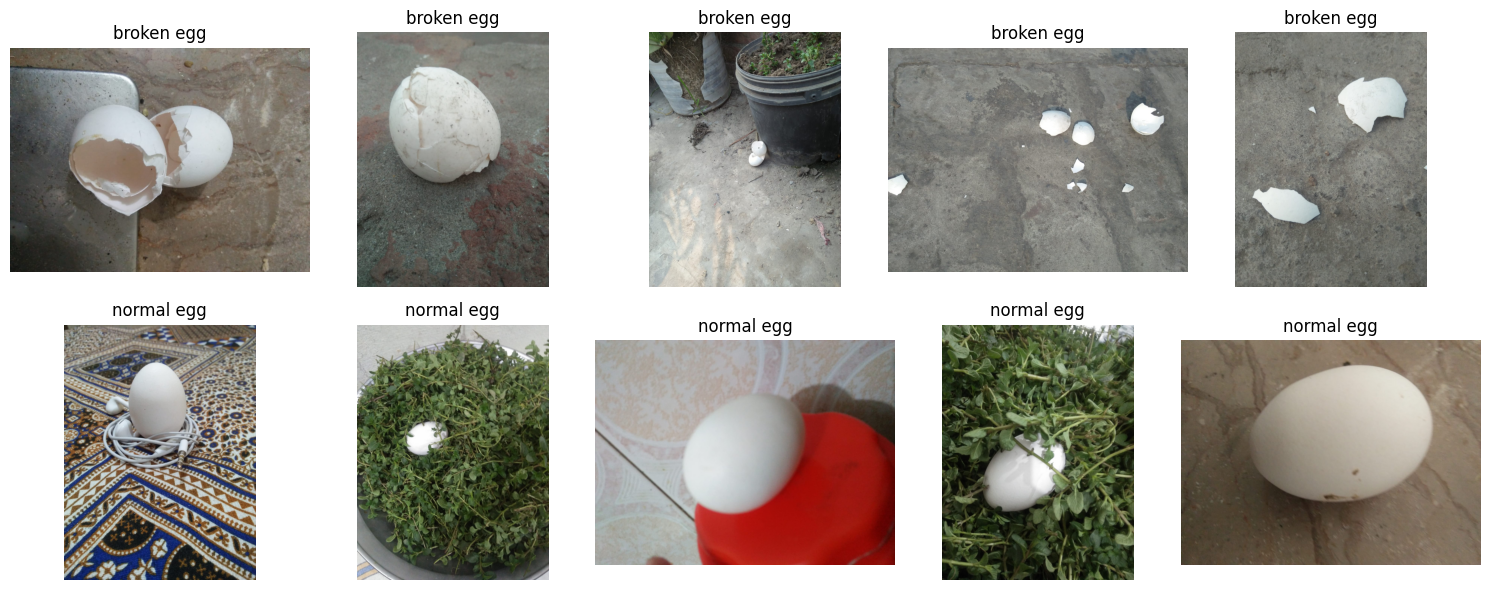

In [3]:
import os 
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

folder1 = "/kaggle/input/eggs-images-classification-damaged-or-not/Eggs Classification/Damaged"
folder2 = "/kaggle/input/eggs-images-classification-damaged-or-not/Eggs Classification/Not Damaged"

# Get all image file name
image1 = [os.path.join(folder1, f) for f in os.listdir(folder1)]
image2 = [os.path.join(folder2, f) for f in os.listdir(folder2)]

# Random select 
random1 = random.sample(image1, 5)
random2 = random.sample(image2, 5)

# PLot
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# For normal eggs
for i, img_path in enumerate(random1):
    img = mpimg.imread(img_path)
    axes[0, i].imshow(img)
    axes[0, i].set_title("broken egg")
    axes[0, i].axis('off')

# Broken eggs
for i, img_path in enumerate(random2):
    img = mpimg.imread(img_path)
    axes[1, i].imshow(img)
    axes[1, i].set_title("normal egg")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [4]:
import cv2

image = cv2.imread("/kaggle/input/eggs-images-classification-damaged-or-not/Eggs Classification/Damaged/damaged_115.jpg")
print(image.shape)

(1280, 960, 3)


In [5]:
# Load and resize the dataset
dataset_path = "/kaggle/input/eggs-images-classification-damaged-or-not/Eggs Classification"

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224,224),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224,224),
    batch_size=32
)

Found 794 files belonging to 2 classes.
Using 636 files for training.


I0000 00:00:1761665431.742007      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 794 files belonging to 2 classes.
Using 158 files for validation.


In [6]:
# Demo model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,768,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,825,410 (10.78 MB)

 Trainable params: 2,825,410 (10.78 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10


I0000 00:00:1761665436.579469     105 service.cc:148] XLA service 0x7fa8fc0046e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761665436.580084     105 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1761665436.979280     105 cuda_dnn.cc:529] Loaded cuDNN version 90300


 3/20 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4201 - loss: 209.2940

I0000 00:00:1761665440.402499     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 431ms/step - accuracy: 0.5877 - loss: 153.5955 - val_accuracy: 0.8354 - val_loss: 0.6891
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 0.7672 - loss: 0.7314 - val_accuracy: 0.8101 - val_loss: 0.6838
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step - accuracy: 0.7701 - loss: 0.6803 - val_accuracy: 0.8354 - val_loss: 0.6703
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 224ms/step - accuracy: 0.7979 - loss: 0.6709 - val_accuracy: 0.8354 - val_loss: 0.6607
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.7794 - loss: 0.6643 - val_accuracy: 0.8354 - val_loss: 0.6513
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step - accuracy: 0.7731 - loss: 0.6576 - val_accuracy: 0.8354 - val_loss: 0.6421
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - accuracy: 0.7753 - loss: 0.6499 - val_accuracy: 0.8354 - val_loss: 0.6329
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - accuracy: 0.7973 - loss: 0.6384 - val_accuracy: 0.8354 - v

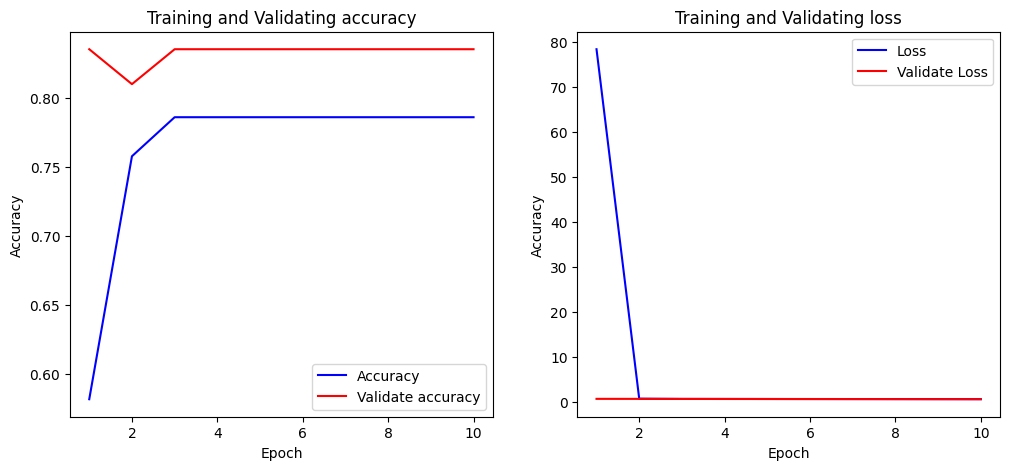

In [9]:
# evaluate demo

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# plot

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b', label='Accuracy')
plt.plot(epochs, val_acc, 'r', label="Validate accuracy")
plt.title('Training and Validating accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Loss')
plt.plot(epochs, val_loss, 'r', label="Validate Loss")
plt.title('Training and Validating loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# :DDDDDD